In [1]:
import earthaccess
import pathlib
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import LogNorm
import cmocean
import os
from datetime import datetime
import pandas as pd

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2013-1-28", "2025-6-10")

results = earthaccess.search_data(
    short_name="OMPS_NPP_LP_L3_AER_MONTHLY",
    temporal=tspan,
)

paths = earthaccess.open(results)

Granules found: 149
Opening 149 granules, approx size: 0.84 GB


QUEUEING TASKS | :   0%|          | 0/149 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/149 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/149 [00:00<?, ?it/s]

In [4]:
ds_test = xr.open_mfdataset(paths, combine='nested', concat_dim='time')

In [16]:
ds_test

<xarray.Dataset> Size: 957MB
Dimensions:             (time: 149, Longitude: 24, Latitude: 36, Altitude: 41,
                         Wavelength: 6)
Coordinates:
  * Altitude            (Altitude) float32 164B 0.5 1.5 2.5 ... 38.5 39.5 40.5
  * Latitude            (Latitude) float32 144B -87.5 -82.5 -77.5 ... 82.5 87.5
  * Longitude           (Longitude) float32 96B -172.5 -157.5 ... 157.5 172.5
  * Wavelength          (Wavelength) float32 24B 510.0 600.0 ... 869.0 997.0
Dimensions without coordinates: time
Data variables: (12/14)
    ExtRatioAvg         (time, Longitude, Latitude, Altitude, Wavelength) float32 127MB dask.array<chunksize=(1, 24, 36, 41, 6), meta=np.ndarray>
    ExtRatioStDev       (time, Longitude, Latitude, Altitude, Wavelength) float32 127MB dask.array<chunksize=(1, 24, 36, 41, 6), meta=np.ndarray>
    ExtRatioStErr       (time, Longitude, Latitude, Altitude, Wavelength) float32 127MB dask.array<chunksize=(1, 24, 36, 41, 6), meta=np.ndarray>
    ExtinctionAvg       (time, Longitude, Latitude, Altitude, Wavelength) float32 127MB dask.array<chunksize=(1, 24, 36, 41, 6), meta=np.ndarray>
    ExtinctionStDev     (time, Longitude, Latitude, Altitude, Wavelength) float32 127MB dask.array<chunksize=(1, 24, 36, 41, 6), meta=np.ndarray>
    ExtinctionStErr     (time, Longitude, Latitude, Altitude, Wavelength) float32 127MB dask.array<chunksize=(1, 24, 36, 41, 6), meta=np.ndarray>
    ...                  ...
    NumSamples          (time, Longitude, Latitude, Wavelength) float32 3MB dask.array<chunksize=(1, 24, 36, 6), meta=np.ndarray>
    Pressure            (time, Longitude, Latitude, Altitude) float32 21MB dask.array<chunksize=(1, 24, 36, 41), meta=np.ndarray>
    ScatteringAngle     (time, Longitude, Latitude) float32 515kB dask.array<chunksize=(1, 24, 36), meta=np.ndarray>
    StratColumn         (time, Longitude, Latitude, Wavelength) float32 3MB dask.array<chunksize=(1, 24, 36, 6), meta=np.ndarray>
    Temperature         (time, Longitude, Latitude, Altitude) float32 21MB dask.array<chunksize=(1, 24, 36, 41), meta=np.ndarray>
    TropopauseAltitude  (time, Longitude, Latitude) float32 515kB dask.array<chunksize=(1, 24, 36), meta=np.ndarray>
Attributes: (12/65)
    APPName:                         LP-L3-AER-MONTHLY
    APPVersion:                      1.0.8
    ArchiveSetName:                  OMPS NPP v2.5 Processing Stream 2
    ArchiveSetNumber:                61006
    Conventions:                     ACDD-1.3
    DOI:                             10.5067/BXR8K06YPR6U
    ...                              ...
    references:                      Taha, G., Loughman, R., Zhu, T., Thomaso...
    source:                          Suomi-NPP OMPS Limb Profiler
    summary:                         OMPS-NPP LP L3 Gridded Aerosol Monthly V1.0
    time_coverage_end:               2013-02-01T00:00:00Z
    time_coverage_start:             2013-01-01T00:00:00Z
    title:                           Suomi-NPP OMPS Limb Profiler Gridded Aer...

In [5]:
datasets = []
for i, path in enumerate(paths):
    try:
        ds = xr.open_dataset(path)
        ds = ds.expand_dims('time')
        ds['time'] = [i]
        datasets.append(ds)
        #print(f"File {i}: {list(ds.variables)}")
    except Exception as e:
        print(f"Error opening file {i}: {e}")

In [ ]:
datasets

In [6]:
save_directory = "Plots/OMPS_Extinction_Monthly"
os.makedirs(save_directory, exist_ok=True)

=== STRATCOLUMN DATA STRUCTURE ===
StratColumn shape: (1, 24, 36, 6)
StratColumn dimensions: ('time', 'Longitude', 'Latitude', 'Wavelength')
Available dimensions: ['time', 'Longitude', 'Latitude', 'Wavelength']
Available coordinates: ['Latitude', 'Longitude', 'Wavelength', 'time']
Plot saved to: Plots/OMPS_Extinction_Monthly/AOD_DifferentWavelengths.png


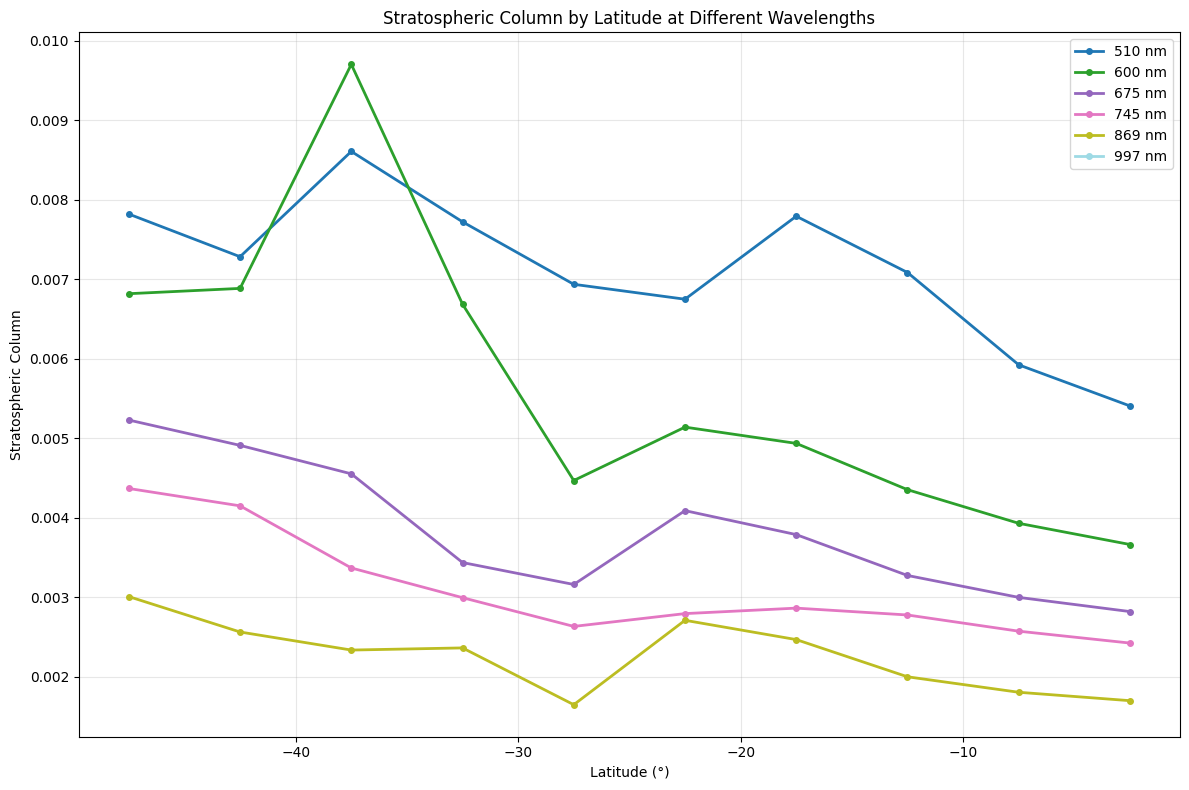

<Figure size 1200x800 with 0 Axes>

In [54]:
# Fixed code for StratColumn plotting
print("=== STRATCOLUMN DATA STRUCTURE ===")
StratColumn_xr = datasets[0].StratColumn
print(f"StratColumn shape: {StratColumn_xr.shape}")
print(f"StratColumn dimensions: {StratColumn_xr.dims}")

# Check what dimensions and coordinates are available
print(f"Available dimensions: {list(StratColumn_xr.dims)}")
print(f"Available coordinates: {list(StratColumn_xr.coords)}")

# Get available wavelengths
wavelengths = datasets[0].Wavelength.values
wavelengths_to_plot = [510, 600, 675, 745, 869, 997]  

plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(wavelengths_to_plot)))

# It appears StratColumn doesn't have altitude - it might be a column sum
# Let's plot StratColumn by latitude/longitude for each wavelength

for i, target_wavelength in enumerate(wavelengths_to_plot):
    if target_wavelength in wavelengths:
        # Get data for this wavelength
        wavelength_data = StratColumn_xr.sel(
            Latitude=slice(-50, 0), 
            Longitude=slice(-180, 180),
            Wavelength=target_wavelength
        )
        
        # Calculate zonal mean (average over longitude)
        zonal_mean = wavelength_data.mean(dim='Longitude')
        
        # Get latitude values
        latitudes = zonal_mean.Latitude.values
        
        # Plot zonal mean vs latitude
        plt.plot(latitudes, zonal_mean.values.flatten(), 'o-',
                linewidth=2, markersize=4,
                color=colors[i],
                label=f'{target_wavelength} nm')

plt.xlabel('Latitude (°)')
plt.ylabel('Stratospheric Column')
plt.title('Stratospheric Column by Latitude at Different Wavelengths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
save_path = os.path.join(save_directory, 'AOD_DifferentWavelengths.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {save_path}")
plt.show()

# Alternative: Plot a global map for one wavelength
target_wavelength = 675  # Choose one wavelength for map display

plt.figure(figsize=(12, 8))
map_data = StratColumn_xr.sel(Wavelength=target_wavelength)


In [46]:
# Debugging version to find out what's wrong
print("=== DEBUGGING STRATCOLUMN PLOT ===")

# Check basic data structure
StratColumn_xr = datasets[0].StratColumn
wavelengths = datasets[0].Wavelength.values
altitudes = datasets[0].Altitude.values

print(f"StratColumn shape: {StratColumn_xr.shape}")
print(f"StratColumn dimensions: {StratColumn_xr.dims}")
print(f"Available wavelengths: {wavelengths}")
print(f"Altitude range: {altitudes.min():.1f} to {altitudes.max():.1f} km")

wavelengths_to_plot = [510, 600, 675, 745, 869, 997]

plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(wavelengths_to_plot)))

successful_plots = 0

for i, target_wavelength in enumerate(wavelengths_to_plot):
    print(f"\n--- Processing {target_wavelength} nm ---")
    
    if target_wavelength in wavelengths:
        try:
            # Check original data
            print(f"Original StratColumn shape: {StratColumn_xr.shape}")
            
            # Select regional data
            regional_data = StratColumn_xr.sel(
                Latitude=slice(-50, 0), 
                Longitude=slice(-180, 180),
                Wavelength=target_wavelength
            )
            
            print(f"After selection shape: {regional_data.shape}")
            print(f"Dimensions: {regional_data.dims}")
            
            # Check for valid data
            total_values = regional_data.size
            nan_values = np.isnan(regional_data.values).sum()
            valid_values = total_values - nan_values
            
            print(f"Total values: {total_values}")
            print(f"NaN values: {nan_values}")
            print(f"Valid values: {valid_values}")
            
            if valid_values == 0:
                print(f"WARNING: No valid data for {target_wavelength} nm!")
                continue
            
            if 'Altitude' in regional_data.dims:
                # Calculate profile
                profile = regional_data.mean(dim=['Latitude', 'Longitude'])
                profile_values = profile.values.flatten()
                
                print(f"Profile shape: {profile_values.shape}")
                print(f"Profile range: {np.nanmin(profile_values):.6f} to {np.nanmax(profile_values):.6f}")
                print(f"Valid profile points: {np.sum(~np.isnan(profile_values))}")
                
                # Only plot if we have valid data
                if np.any(~np.isnan(profile_values)):
                    plt.plot(profile_values, altitudes, 'o-', 
                            linewidth=2, markersize=4, 
                            color=colors[i], 
                            label=f'{target_wavelength} nm')
                    successful_plots += 1
                    print(f"SUCCESS: Plotted {target_wavelength} nm")
                else:
                    print(f"ERROR: All profile values are NaN for {target_wavelength} nm")
            else:
                print(f"ERROR: No Altitude dimension for {target_wavelength} nm")
                print(f"Available dimensions: {list(regional_data.dims)}")
                
        except Exception as e:
            print(f"ERROR processing {target_wavelength} nm: {e}")
    else:
        print(f"ERROR: {target_wavelength} nm not in available wavelengths")

print(f"\n=== SUMMARY ===")
print(f"Successful plots: {successful_plots}")

if successful_plots > 0:
    plt.xlabel('Stratospheric Column')
    plt.ylabel('Altitude (km)')
    plt.title('Stratospheric Column Profiles at Different Wavelengths')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    save_path = os.path.join(save_directory, 'StratColumn_Debug.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to: {save_path}")
    plt.show()
else:
    print("No data to plot! Possible issues:")
    print("1. StratColumn might be all NaN values")
    print("2. Regional selection might be excluding all data")
    print("3. Wavelengths might not match")
    print("4. Data structure might be different than expected")
    
    # Try a simpler plot without regional selection
    print("\nTrying without regional selection...")
    
    plt.figure(figsize=(12, 8))
    test_wavelength = wavelengths[0]  # Use first available wavelength
    
    try:
        test_data = StratColumn_xr.sel(Wavelength=test_wavelength)
        print(f"Test data shape: {test_data.shape}")
        
        if 'Altitude' in test_data.dims:
            # Try global mean
            global_profile = test_data.mean(dim=['Latitude', 'Longitude'])
            global_values = global_profile.values.flatten()
            
            if np.any(~np.isnan(global_values)):
                plt.plot(global_values, altitudes, 'o-', linewidth=2, label=f'Global {test_wavelength} nm')
                plt.xlabel('Stratospheric Column')
                plt.ylabel('Altitude (km)')
                plt.title('Test: Global StratColumn Profile')
                plt.legend()
                plt.grid(True)
                plt.show()
                print("Test plot created successfully!")
            else:
                print("Even global data is all NaN")
        else:
            print("No Altitude dimension found")
            
    except Exception as e:
        print(f"Test plot failed: {e}")
    
    plt.close()

=== DEBUGGING STRATCOLUMN PLOT ===
StratColumn shape: (1, 24, 36, 6)
StratColumn dimensions: ('time', 'Longitude', 'Latitude', 'Wavelength')
Available wavelengths: [510. 600. 675. 745. 869. 997.]
Altitude range: 0.5 to 40.5 km

--- Processing 510 nm ---
Original StratColumn shape: (1, 24, 36, 6)
After selection shape: (1, 24, 10)
Dimensions: ('time', 'Longitude', 'Latitude')
Total values: 240
NaN values: 0
Valid values: 240
ERROR: No Altitude dimension for 510 nm
Available dimensions: ['time', 'Longitude', 'Latitude']

--- Processing 600 nm ---
Original StratColumn shape: (1, 24, 36, 6)
After selection shape: (1, 24, 10)
Dimensions: ('time', 'Longitude', 'Latitude')
Total values: 240
NaN values: 0
Valid values: 240
ERROR: No Altitude dimension for 600 nm
Available dimensions: ['time', 'Longitude', 'Latitude']

--- Processing 675 nm ---
Original StratColumn shape: (1, 24, 36, 6)
After selection shape: (1, 24, 10)
Dimensions: ('time', 'Longitude', 'Latitude')
Total values: 240
NaN values

<Figure size 1200x800 with 0 Axes>

In [15]:
save_directory = "Plots/Spatial Stratospheric Aerosols"
os.makedirs(save_directory, exist_ok=True)

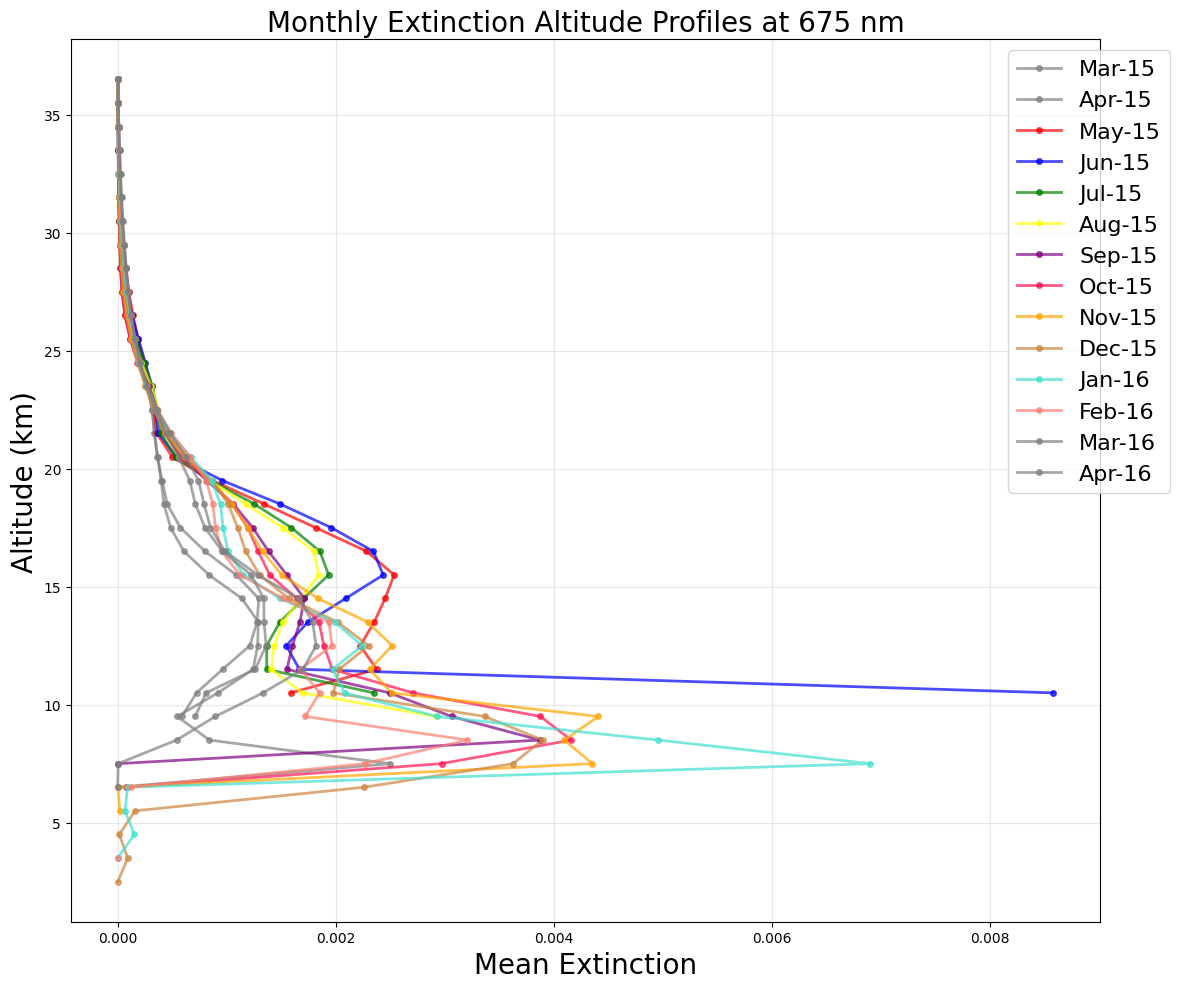

In [19]:
wavelengths = datasets[0].Wavelength.values
altitudes = datasets[0].Altitude.values
wavelengths_to_plot = [675] 

month_names = ['Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16']
month_labels = month_names[:len(datasets)]

custom_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#FFA500', '#800080', '#008000', '#000080', '#800000', '#008080', '#FF69B4']

for wavelength in wavelengths_to_plot:
    if wavelength in wavelengths:
        plt.figure(figsize=(12, 10))
        
        for month_idx, dataset in enumerate(datasets):
            regional_data = dataset.ExtinctionAvg.sel(Latitude=slice(-50, 0), Longitude=slice(-180, 180), Wavelength=wavelengths_to_plot)
            
            altitude_profile = regional_data.mean(dim=['Latitude', 'Longitude'])
            extinction_values = altitude_profile.values.flatten()
            
            # Use custom_colors with the month_idx
            plt.plot(extinction_values, altitudes, 'o-', 
                    color=custom_colors[month_idx], 
                    label=month_labels[month_idx], 
                    alpha=0.7, 
                    markersize=4,
                    linewidth=2)
        
        plt.xlabel('Mean Extinction', fontsize=20)
        plt.ylabel('Altitude (km)', fontsize=20)
        plt.title(f'Monthly Extinction Altitude Profiles at {wavelength} nm', fontsize=20)
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        save_path = os.path.join(save_directory, 'CalbucoExtinction.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

NameError: name 'save_directory' is not defined

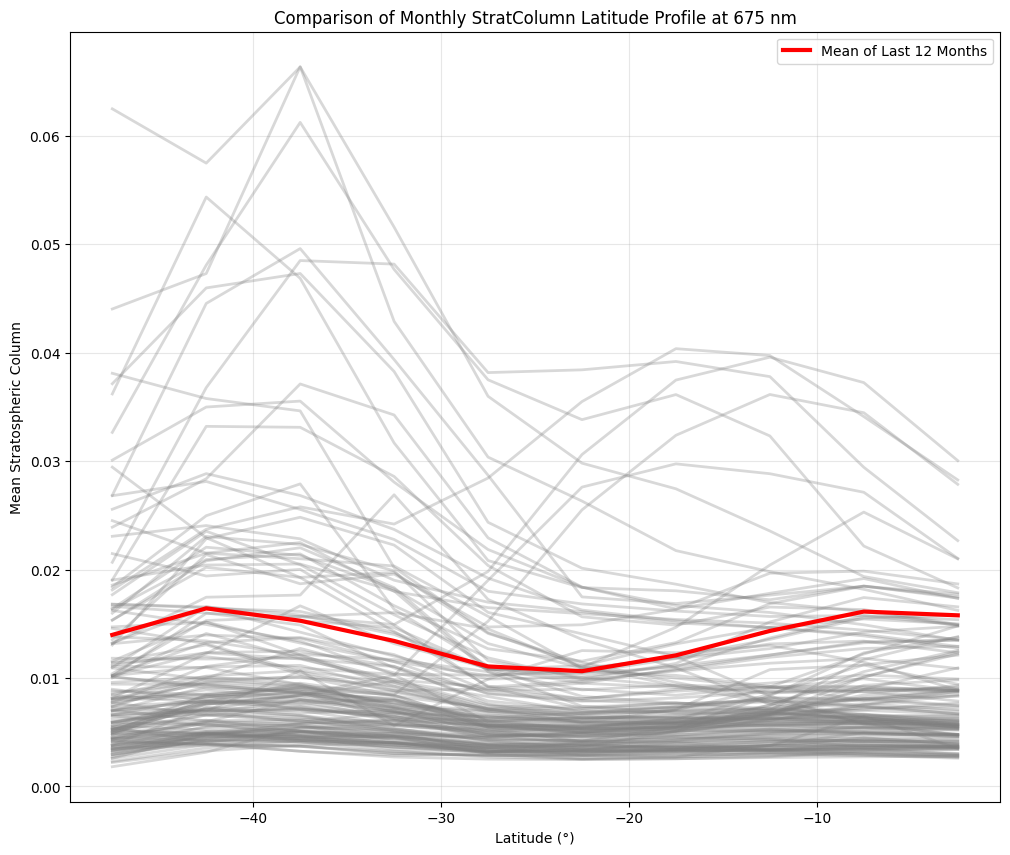

In [12]:
wavelengths = datasets[0].Wavelength.values
wavelengths_to_plot = [675]

datasets_subsets = datasets[:148]

for wavelength in wavelengths_to_plot:
    if wavelength in wavelengths:
        plt.figure(figsize=(12, 10))
        
        # Get latitude range for plotting
        sample_data = datasets_subsets[0].StratColumn.sel(
            Latitude=slice(-50, 0), 
            Longitude=slice(-180, 180), 
            Wavelength=wavelength
        )
        latitudes = sample_data.Latitude.values
        
        for month_idx, dataset in enumerate(datasets_subsets):
            regional_data = dataset.StratColumn.sel(
                Latitude=slice(-50, 0), 
                Longitude=slice(-180, 180), 
                Wavelength=wavelength
            )
            
            # Calculate zonal mean (average over longitude)
            zonal_mean = regional_data.mean(dim='Longitude')
            stratcolumn_values = zonal_mean.values.flatten()
            
            plt.plot(latitudes, stratcolumn_values, 
                    color='gray', alpha=0.3, linewidth=2)
    
        plt.ylabel('Mean Stratospheric Column')
        plt.xlabel('Latitude (°)')
        plt.title(f'Comparison of Monthly StratColumn Latitude Profile at {wavelength} nm')
        plt.grid(True, alpha=0.3)

        # Calculate mean of last 12 months
        last_12_datasets = datasets_subsets[-12:]
        last_12_profiles = []

        for dataset in last_12_datasets:
            regional_data = dataset.StratColumn.sel(
                Latitude=slice(-50, 0), 
                Longitude=slice(-180, 180), 
                Wavelength=wavelength
            )
            
            zonal_mean = regional_data.mean(dim='Longitude')
            stratcolumn_values = zonal_mean.values.flatten()
            last_12_profiles.append(stratcolumn_values)

        mean_profile = np.mean(last_12_profiles, axis=0)
        plt.plot(latitudes, mean_profile, color='red', alpha=1, 
                linewidth=3, label='Mean of Last 12 Months')
        
        plt.legend()
        save_path = os.path.join(save_directory, 'StratColumn_YearlyComparison_by_Latitude.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

/tmp/ipykernel_411/140346429.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yearly_data[current_year][current_month] = float(regional_average)
/tmp/ipykernel_411/140346429.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'AOD': float(aod_value),
/tmp/ipykernel_411/140346429.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yearly_data[current_year][current_month] = float(regional_average)
/tmp/ipykernel_411/140346429.py:43: DeprecationWarning: Conversi

Exported 35520 individual data points to: stratospheric_aod_675nm_SH.csv
Plot saved with different colored lines for each year: Plots/OMPS_Extinction_Monthly/HungaTongaReplication_Colored.png


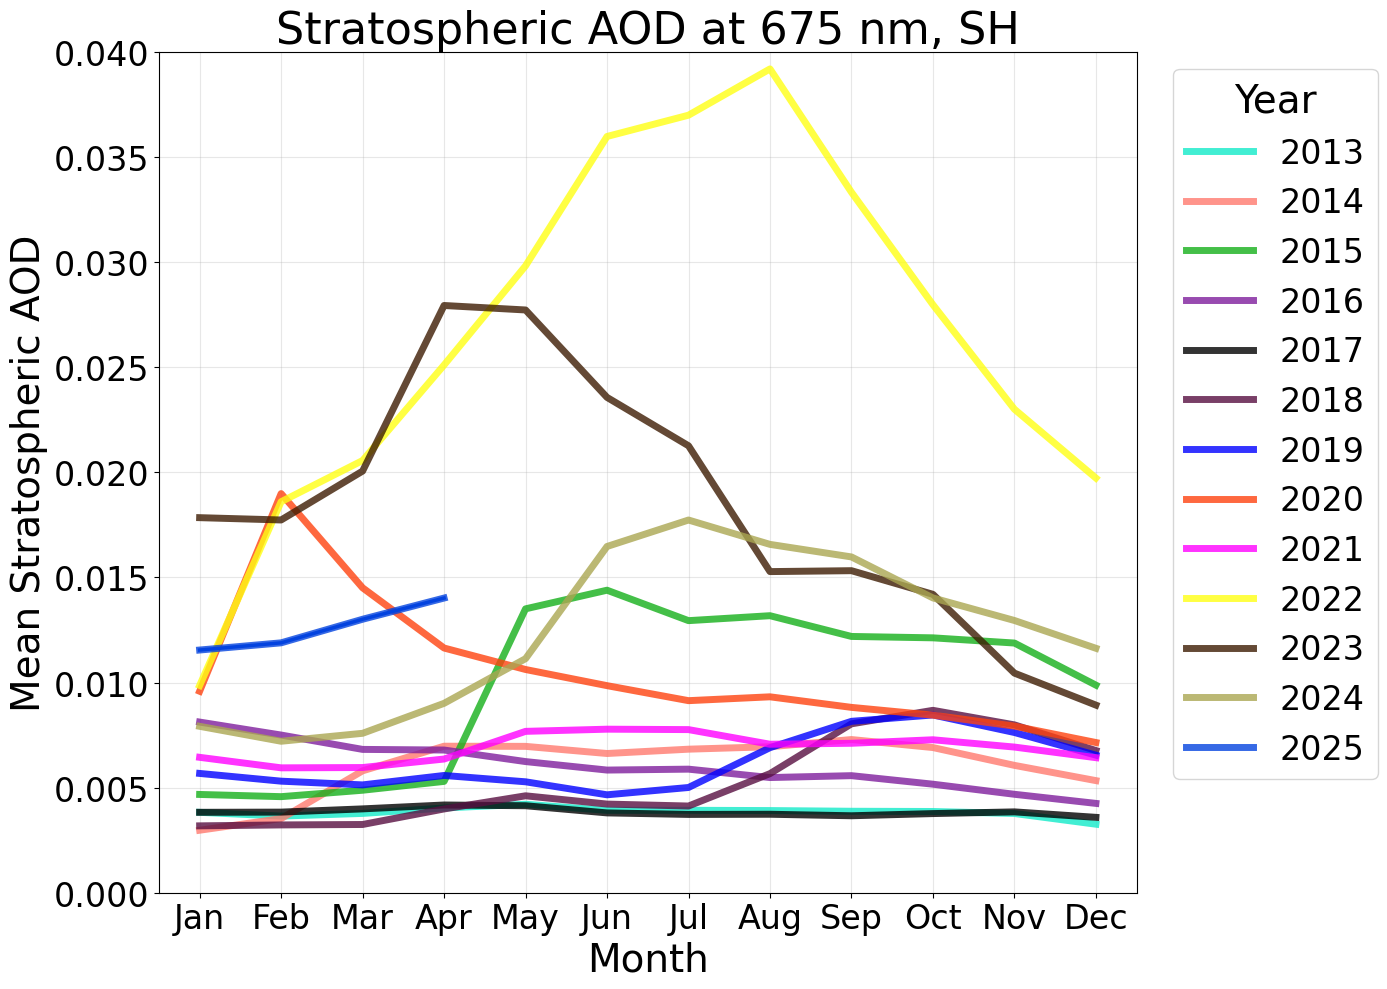

In [12]:
wavelengths = datasets[0].Wavelength.values
wavelengths_to_plot = [675]
datasets_subsets = datasets[:148]

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
start_year = 2013  
start_month = 1    

latitude_slice = slice(-50, 0)
longitude_slice = slice(-180, 180)

all_data_points = []

for wavelength in wavelengths_to_plot:
    if wavelength in wavelengths:
        plt.figure(figsize=(14, 10))
        yearly_data = {}
        
        for month_idx, dataset in enumerate(datasets_subsets):
            total_months_elapsed = month_idx
            current_year = start_year + (start_month + total_months_elapsed - 1) // 12
            current_month = (start_month + total_months_elapsed - 1) % 12 + 1

            regional_data = dataset.StratColumn.sel(Latitude=latitude_slice, Longitude=longitude_slice, Wavelength=wavelength)
            regional_average = regional_data.mean(dim=['Latitude', 'Longitude']).values

            if current_year not in yearly_data:
                yearly_data[current_year] = {}
            yearly_data[current_year][current_month] = float(regional_average)

            date_obj = datetime(current_year, current_month, 1)
            for lat_idx, lat in enumerate(regional_data.Latitude.values):
                for lon_idx, lon in enumerate(regional_data.Longitude.values):
                    aod_value = regional_data.isel(Latitude=lat_idx, Longitude=lon_idx).values

                    if not np.isnan(aod_value):
                        all_data_points.append({
                            'Datetime': date_obj,
                            'Year': current_year,
                            'Month': current_month,
                            'Latitude': float(lat),
                            'Longitude': float(lon),
                            'AOD': float(aod_value),
                            'Wavelength_nm': float(wavelength)
                        })
        
        unique_years = sorted(yearly_data.keys())
        num_years = len(unique_years)
        custom_colors = ['#13EAC9', '#FF796E', '#15B01A', '#7E1E9C', '#000000', '#580F41', '#0000FF', '#FE420F', '#FF00FF', '#FFFF14', '#3D1C02', '#AAA651', '#0343DF']
        colors = [custom_colors[i % len(custom_colors)] for i in range(num_years)] 
        
        for i, year in enumerate(unique_years):
            months_data = yearly_data[year]
            months = list(months_data.keys())
            stratcolumns = list(months_data.values())
            
            if len(months) < 3:
                continue
            
            month_values = sorted(zip(months, stratcolumns))
            months = [m for m, _ in month_values]
            stratcolumns = [s for _, s in month_values]
                
            plt.plot(months, stratcolumns, '-', color=colors[i], linewidth=5, label=f'{year}', alpha=0.8)
        
        plt.xlabel('Month', fontsize=28)
        plt.ylabel('Mean Stratospheric AOD', fontsize=28)
        plt.title(f'Stratospheric AOD at {wavelength} nm, SH', fontsize=32)
        plt.xticks(range(1, 13), month_names, fontsize=24)
        plt.yticks(fontsize=24)
        plt.xlim(0.5, 12.5)
        plt.ylim(0, 0.04)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Year', title_fontsize=28, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=24)
        
        if unique_years:
            latest_year = max(unique_years)
            if latest_year in yearly_data:
                latest_months = list(yearly_data[latest_year].keys())
                latest_values = list(yearly_data[latest_year].values())
                latest_month_values = sorted(zip(latest_months, latest_values))
                latest_months = [m for m, _ in latest_month_values]
                latest_values = [s for _, s in latest_month_values]
                
                plt.plot(latest_months, latest_values, '-', color=colors[-1], linewidth=2.5,alpha=1.0)

        df_all_points = pd.DataFrame(all_data_points)
        
        # Save CSV file
        csv_filename = f'stratospheric_aod_{wavelengths_to_plot[0]}nm_SH.csv'
        df_all_points.to_csv(csv_filename, index=False, date_format='%Y-%m-%d')
        print(f"Exported {len(df_all_points)} individual data points to: {csv_filename}")
        
        plt.tight_layout()
        save_path = os.path.join(save_directory, 'HungaTongaReplication_Colored.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved with different colored lines for each year: {save_path}")
        plt.show()